In [ ]:
import os
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)
source_zip_path = '/content/drive/MyDrive/PRML/2D_data_14-20230914T121358Z-001.zip'
destination_folder = '/content/data'

os.makedirs(destination_folder, exist_ok=True)
with zipfile.ZipFile(source_zip_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [ ]:
path_folder='/content/data/2D_data_14/'
train_path_50=path_folder + 'train50_14.csv'
train_path_200=path_folder + 'train200_14.csv'

val_path=path_folder + 'val_14.csv'
test_path=path_folder + 'test_14.csv'

data = pd.read_csv(train_path_200)



In [ ]:
data


,x1,x2,y
0,2.283709,2.220661,15.551149
1,-1.541939,-4.597145,5.228767
2,1.710932,-0.945772,8.597988
3,3.054300,0.162833,28.989088
4,4.467562,0.806452,73.647501
...,...,...,...
195,0.002785,-0.283505,3.210091
196,-4.306059,-4.085780,9.777310
197,-4.101231,1.256819,10.355494
198,1.009120,0.505317,3.895619


In [ ]:
train_200 = np.genfromtxt(train_path_200, delimiter=',',skip_header=1, dtype=np.float32)
train_50 = np.genfromtxt(train_path_50, delimiter=',',skip_header=1, dtype=np.float32)

X_train_200=train_200[:,:-1]
y_train_200=train_200[:,-1]
X_train_50=train_50[:,:-1]
y_train_50=train_50[:,-1]

val_data = np.genfromtxt(val_path, delimiter=',',skip_header=1, dtype=np.float32)
test_data = np.genfromtxt(test_path, delimiter=',',skip_header=1, dtype=np.float32)

X_val=val_data[:,:-1]
y_val=val_data[:,-1]
X_test=test_data[:,:-1]
y_test=test_data[:,-1]


In [ ]:
X_train_200.shape

(200, 2)

In [ ]:
def polynomial_basis_combination(X,degree):
  dimension=X.shape[1]
  N=X.shape[0]

  basis_combinations = []

  def gen_comb(curr_comb, M,s_d):

    if M == 0:
      return
    for d in range(s_d,dimension):
      curr_comb.append(curr_comb[-1]*X[:,d])
      basis_combinations.append(curr_comb[-1])
      gen_comb(curr_comb,M-1,d)
      curr_comb.pop()

  curr_comb= [np.ones((N))]
  basis_combinations.append(curr_comb[-1])
  gen_comb(curr_comb,degree,0)
  return np.array(basis_combinations).T

def polynomial_regression(data,y,degree):

  X = polynomial_basis_combination(data,degree)
  X = np.linalg.pinv(X)
  wstar=np.matmul(X,y)
  return wstar

def polynomial_regression_regularization(data,y,degree,lamda):

  X = polynomial_basis_combination(data,degree)
  X = np.matmul(np.linalg.pinv(np.matmul((X.T),X) + lamda*np.identity(X.shape[1])),(X.T))
  wstar=np.matmul(X,y)
  return wstar

In [ ]:
degrees = np.array([2,3,6])
N_200=X_train_50.shape[0]


In [ ]:
Xp=np.array([[2],[3]]).T
basis=polynomial_basis_combination(Xp,5)
basis

array([[  1.,   2.,   4.,   8.,  16.,  32.,  48.,  24.,  72.,  12.,  36.,
        108.,   6.,  18.,  54., 162.,   3.,   9.,  27.,  81., 243.]])

## Polynomial regression without regularization
### N=200

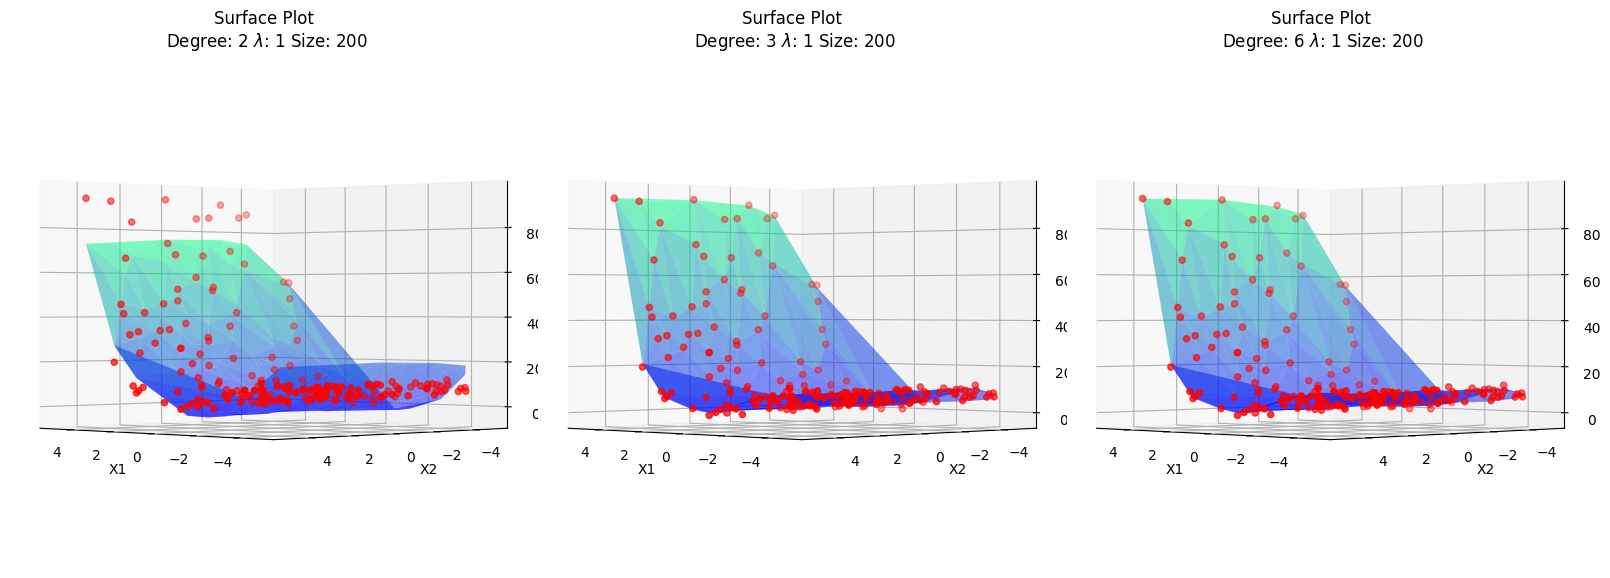

In [ ]:
i=0
fig = plt.figure(figsize=(16, 6))
lam=1
for degree in degrees:
  i=i+1
  basis=polynomial_basis_combination(X_train_200,degree)
  wstar = polynomial_regression_regularization(X_train_200,y_train_200,degree,lam)
  ypred= np.matmul(basis, wstar)

  # Plot the original data
  ax = fig.add_subplot(1,3,i,projection='3d')
  ax.plot_trisurf(X_train_200[:,0], X_train_200[:,1], ypred, cmap=plt.cm.winter,alpha=0.5,label='Y_pred')
  ax.view_init(0, 135)
  ax.scatter(X_train_200[:,0], X_train_200[:,1], y_train_200,color='r', marker='o',label='Y_true')
  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  ax.set_zlabel('Y')
  ax.set_title('Surface Plot \nDegree: ' + str(degree)+ ' $\lambda$: ' + str(lam) + ' Size: '+ str(200))

plt.tight_layout()  # Adjust spacing between subplots


## Polynomial regression with N=50

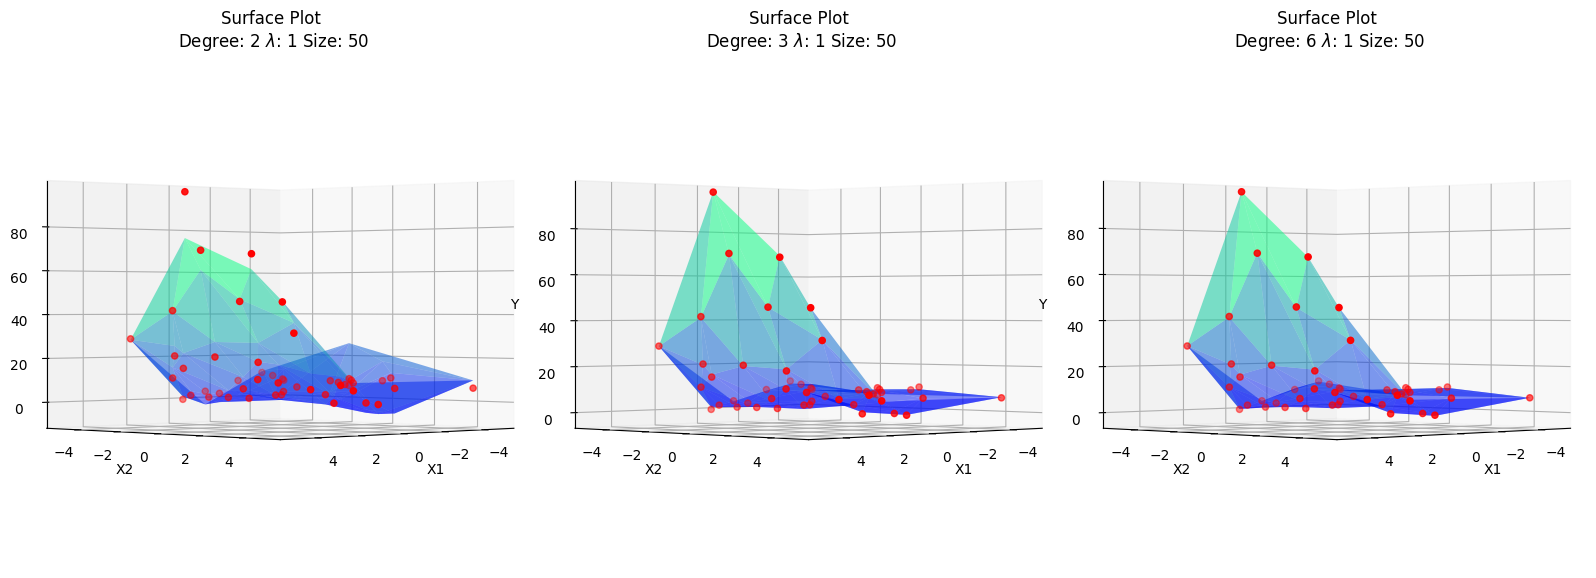

In [ ]:
i=0
fig = plt.figure(figsize=(16, 6))
lam=1
for degree in degrees:
  i=i+1
  basis=polynomial_basis_combination(X_train_50,degree)
  wstar = polynomial_regression_regularization(X_train_50,y_train_50,degree,lam)
  ypred= np.matmul(basis, wstar)

  # Plot the original data
  ax = fig.add_subplot(1,3,i,projection='3d')
  ax.plot_trisurf(X_train_50[:,0], X_train_50[:,1], ypred, cmap=plt.cm.winter,alpha=0.5,label='Y_pred')
  ax.view_init(0, 45)
  ax.scatter(X_train_50[:,0], X_train_50[:,1], y_train_50,color='r', marker='o',label='Y_true')
  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  ax.set_zlabel('Y')
  ax.set_title('Surface Plot \nDegree: ' + str(degree)+ ' $\lambda$: ' + str(lam) + ' Size: '+ str(50))

plt.tight_layout()  # Adjust spacing between subplots


## Polynomial regression with regularuization
###N=200


In [ ]:
lamda=np.logspace(-8,3,12)
lamda= np.insert(lamda , 0,0)
lamda

array([0.e+00, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [ ]:
i=0
best_M=-1;best_lam=-1;min_err=1e10
for degree in degrees:
  for lam in lamda:
    i=i+1
    N=200
    basis=polynomial_basis_combination(X_train_200,degree)

    wstar = polynomial_regression_regularization(X_train_200,y_train_200,degree,lam)
    ypred_train= np.matmul(basis, wstar)

    basis_1=polynomial_basis_combination(X_val,degree)
    ypred_val= np.matmul(basis_1, wstar)

    basis_2=polynomial_basis_combination(X_test,degree)
    ypred_test= np.matmul(basis_2, wstar)

    erms_train= np.sqrt((np.sum((ypred_train - y_train_200)**2))/N)
    erms_val= np.sqrt((np.sum((ypred_val - y_val)**2))/N)
    erms_test= np.sqrt((np.sum((ypred_test - y_test)**2))/N)
    if(erms_val<min_err):
      min_err=erms_val
      best_M=degree
      best_lam=lam

    print('degree: '+ str(degree) + ' lamda: '+ str(lam)+ '\n')
    print('E_rms_train: '+ str(erms_train) + ' E_rms_val: '+ str(erms_val) + ' E_rms_test: '+ str(erms_test) + '\n\n')


degree: 2 lamda: 0.0

E_rms_train: 7.5012147734167725 E_rms_val: 5.284737725491047 E_rms_test: 4.68010764239758


degree: 2 lamda: 1e-08

E_rms_train: 7.501214773416773 E_rms_val: 5.284737725474246 E_rms_test: 4.680107642391367


degree: 2 lamda: 1e-07

E_rms_train: 7.501214773416773 E_rms_val: 5.284737725323013 E_rms_test: 4.680107642335455


degree: 2 lamda: 1e-06

E_rms_train: 7.5012147734167725 E_rms_val: 5.284737723810662 E_rms_test: 4.680107641776326


degree: 2 lamda: 1e-05

E_rms_train: 7.501214773416776 E_rms_val: 5.284737708687262 E_rms_test: 4.6801076361851015


degree: 2 lamda: 0.0001

E_rms_train: 7.50121477341708 E_rms_val: 5.2847375574537025 E_rms_test: 4.680107580273111


degree: 2 lamda: 0.001

E_rms_train: 7.501214773447473 E_rms_val: 5.284736045159858 E_rms_test: 4.680107021181165


degree: 2 lamda: 0.01

E_rms_train: 7.5012147764860755 E_rms_val: 5.284720926390778 E_rms_test: 4.680101433053896


degree: 2 lamda: 0.1

E_rms_train: 7.5012150796007395 E_rms_val: 5.2845

In [ ]:
print(best_M)
print(best_lam,min_err)

3
1.0 0.8202645562662607


In [ ]:
i=0
best_M=-1;best_lam=-1;min_err=1e10

for degree in degrees:
  for lam in lamda:
    i=i+1
    N=50
    basis=polynomial_basis_combination(X_train_50,degree)
    if(lam == 0):
      wstar=polynomial_regression(X_train_50,y_train_50,degree)
    else:
      wstar = polynomial_regression_regularization(X_train_50,y_train_50,degree,lam)
    ypred_train= np.matmul(basis, wstar)

    basis_1=polynomial_basis_combination(X_val,degree)
    ypred_val= np.matmul(basis_1, wstar)

    basis_2=polynomial_basis_combination(X_test,degree)
    ypred_test= np.matmul(basis_2, wstar)

    erms_train= np.sqrt((np.sum((ypred_train - y_train_50)**2))/N)
    erms_val= np.sqrt((np.sum((ypred_val - y_val)**2))/N)
    erms_test= np.sqrt((np.sum((ypred_test - y_test)**2))/N)

    if(erms_val<min_err):
      min_err=erms_val
      best_M=degree
      best_lam=lam

    print('degree: '+ str(degree) + ' lamda: '+ str(lam)+ '\n')
    print('E_rms_train: '+ str(erms_train/2) + ' E_rms_val: '+ str(erms_val/2) + ' E_rms_test: '+ str(erms_test/2) + '\n\n')



degree: 2 lamda: 0.0

E_rms_train: 3.2836884208287973 E_rms_val: 5.858895364647583 E_rms_test: 5.469739301093803


degree: 2 lamda: 1e-08

E_rms_train: 3.2836884208287973 E_rms_val: 5.858895364625915 E_rms_test: 5.469739301048158


degree: 2 lamda: 1e-07

E_rms_train: 3.2836884208287977 E_rms_val: 5.858895364430919 E_rms_test: 5.4697393006374035


degree: 2 lamda: 1e-06

E_rms_train: 3.2836884208287977 E_rms_val: 5.858895362481045 E_rms_test: 5.4697392965298945


degree: 2 lamda: 1e-05

E_rms_train: 3.28368842082885 E_rms_val: 5.858895342982324 E_rms_test: 5.469739255454839


degree: 2 lamda: 0.0001

E_rms_train: 3.283688420834055 E_rms_val: 5.858895148003885 E_rms_test: 5.469738844715212


degree: 2 lamda: 0.001

E_rms_train: 3.2836884213545257 E_rms_val: 5.858893199089502 E_rms_test: 5.469734738399839


degree: 2 lamda: 0.01

E_rms_train: 3.2836884733433958 E_rms_val: 5.85887379685394 E_rms_test: 5.469693783229245


degree: 2 lamda: 0.1

E_rms_train: 3.283693614621897 E_rms_val: 5.85

In [ ]:
print(best_M)
print(best_lam,min_err)

3
0.0 1.7832382240967597


## Scatter plots

Text(0.5, 1.0, 'Y_train vs Y_Predicted_train\n Degree = 3  $\\lambda$ = 1.0  N=200')

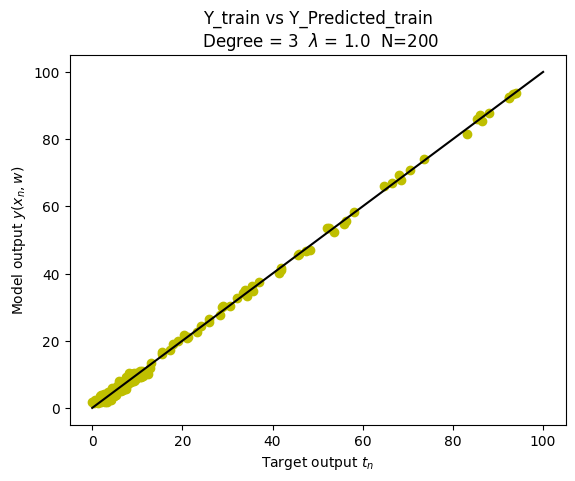

In [ ]:
# Best model
# N=200
# Degree =3, Lamda= 1


x = np.linspace(0,100,10)

basis = polynomial_basis_combination(X_train_200,3)
wstar = polynomial_regression_regularization(X_train_200,y_train_200,3,1)
ypred_train= np.matmul(basis, wstar)



plt.plot(x,x,color = 'black', linewidth = 1.5)
plt.scatter(y_train_200,ypred_train,color='y')

plt.xlabel('Target output $t_n$')
plt.ylabel('Model output $y(x_n,w)$')
plt.title('Y_train vs Y_Predicted_train\n Degree = 3  $\lambda$ = 1.0  N=200')





Text(0.5, 1.0, 'Y_test vs Y_Predicted_test\n Degree = 3  $\\lambda$ = 1.0  N=200')

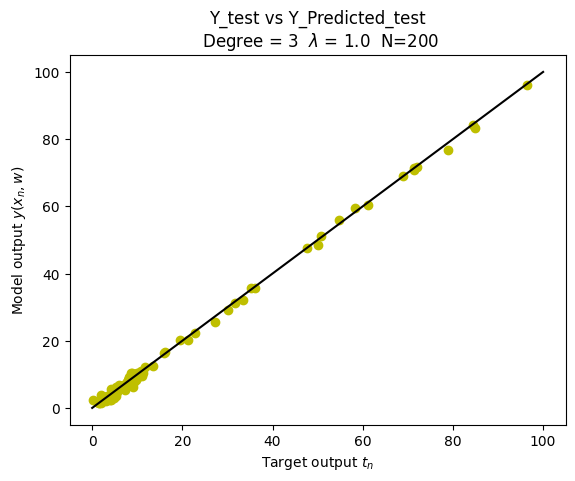

In [ ]:
basis_2=polynomial_basis_combination(X_test,3)
ypred_test= np.matmul(basis_2, wstar)

plt.plot(x,x,color = 'black', linewidth = 1.5)
plt.scatter(y_test,ypred_test,color='y')


plt.xlabel('Target output $t_n$')
plt.ylabel('Model output $y(x_n,w)$')
plt.title('Y_test vs Y_Predicted_test\n Degree = 3  $\lambda$ = 1.0  N=200')




Text(0.5, 1.0, 'Y_validation vs Y_Predicted_validation\n Degree = 3  $\\lambda$ = 1.0  N=200')

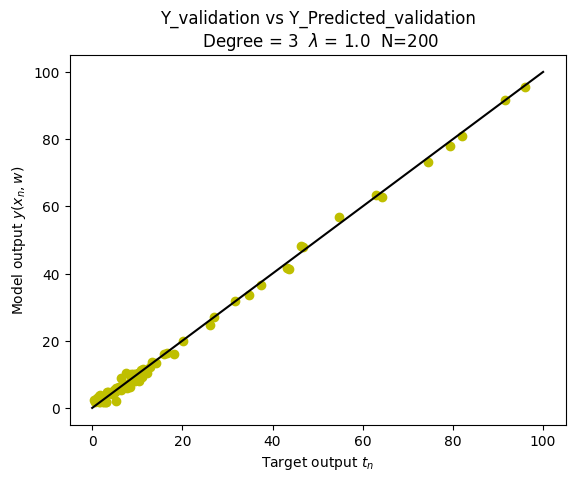

In [ ]:
basis_3=polynomial_basis_combination(X_val,3)
ypred_val= np.matmul(basis_3, wstar)

plt.plot(x,x,color = 'black', linewidth = 1.5)
plt.scatter(y_val,ypred_val,color='y')


plt.xlabel('Target output $t_n$')
plt.ylabel('Model output $y(x_n,w)$')
plt.title('Y_validation vs Y_Predicted_validation\n Degree = 3  $\lambda$ = 1.0  N=200')




In [ ]:
i=0
lamda=[0,1e-6,1e-2,1,100]
for degree in degrees:
  print('degree: '+str(degree)+'\n')

  for lam in lamda:
    i=i+1
    N=50
    basis=polynomial_basis_combination(X_train_50,degree)
    if(lam == 0):
      wstar=polynomial_regression(X_train_50,y_train_50,degree)
    else:
      wstar = polynomial_regression_regularization(X_train_50,y_train_50,degree,lam)
    ypred_train= np.matmul(basis, wstar)
    basis_1=polynomial_basis_combination(X_val,degree)
    ypred_val= np.matmul(basis_1, wstar)
    basis_2=polynomial_basis_combination(X_test,degree)
    ypred_test= np.matmul(basis_2, wstar)

    erms_train= np.sqrt((np.sum((ypred_train - y_train_50)**2))/N)
    erms_val= np.sqrt((np.sum((ypred_val - y_val)**2))/N)
    erms_test= np.sqrt((np.sum((ypred_test - y_test)**2))/N)

    print(str(erms_train) + ' '+ str(erms_val) + ' '+ str(erms_test))

degree: 2

6.567376841657595 11.717790729295166 10.939478602187606
6.5673768416575955 11.71779072496209 10.939478593059789
6.5673769466867915 11.71774759370788 10.93938756645849
6.568310967550799 11.715233892575592 10.932564872618853
7.354425255528954 13.153072470237213 12.413479606386455
degree: 3

0.7269184440060145 1.7832382240967597 1.5707329457103079
0.726918444006017 1.7832382276362595 1.570732950793554
0.7269186664374455 1.7832737743669214 1.5707839901473306
0.7288375701989379 1.7880857122252485 1.577595171076633
1.1156662040314917 2.133673806624208 2.0105870648951907
degree: 6

0.5447287179778075 2.7703982191870375 2.3959848122508065
0.5447287179778372 2.7703978153103033 2.395984793130387
0.5447318143721593 2.7661156473965836 2.3956602710225456
0.559422409586309 2.6868635081814634 2.5964518768850127
1.5838144465420312 12.182913344502733 8.586835928544858


In [ ]:
i=0
lamda=[0,1e-6,1e-2,1,100]
for degree in degrees:
  for lam in lamda:
    i=i+1
    N=200
    basis=polynomial_basis_combination(X_train_200,degree)
    if(lam == 0):
      wstar=polynomial_regression(X_train_200,y_train_200,degree)
    else:
      wstar = polynomial_regression_regularization(X_train_200,y_train_200,degree,lam)
    ypred_train= np.matmul(basis, wstar)
    basis_1=polynomial_basis_combination(X_val,degree)
    ypred_val= np.matmul(basis_1, wstar)
    basis_2=polynomial_basis_combination(X_test,degree)
    ypred_test= np.matmul(basis_2, wstar)

    erms_train= np.sqrt((np.sum((ypred_train - y_train_200)**2))/N)
    erms_val= np.sqrt((np.sum((ypred_val - y_val)**2))/N)
    erms_test= np.sqrt((np.sum((ypred_test - y_test)**2))/N)

    print(str(erms_train) + ' '+ str(erms_val) + ' '+ str(erms_test))
  print('\n')

7.501214773416774 5.284737725491048 4.68010764239758
7.5012147734167725 5.284737723810662 4.680107641776326
7.5012147764860755 5.284720926390778 4.680101433053896
7.501244663595202 5.2831031928557675 4.679516997380027
7.590643764779881 5.2767742312589565 4.7171874004095375


0.8891631120544702 0.820508344027834 0.6825756002648974
0.88916311205447 0.8205083437139127 0.6825756006586521
0.889163125303357 0.82050521212927 0.6825795456813992
0.8892911775550786 0.8202645562662607 0.6830458205164706
1.0584033958491144 0.8955491399116977 0.8033016838028597


0.8450829126033723 0.8928050429328034 0.7037559009930958
0.8450829126033735 0.8928050396384034 0.7037559032549103
0.8450829579607595 0.8927767156923133 0.7037721577037365
0.845480692389102 0.8902549993256125 0.7055115545619824
1.1428822806260588 0.9676756454813361 0.8921194037823212




# Task 4

In [ ]:
path_folder='/content/Concrete_Data_Yeh.csv'
data = pd.read_csv(path_folder)
data

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
train, validate, test = \
              np.split(data.sample(frac=1, random_state=42),
                       [int(.6*len(data)), int(.8*len(data))])

In [ ]:
train

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365,52.91
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28,74.50
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28,10.54
...,...,...,...,...,...,...,...,...,...
407,165.0,128.5,132.1,175.1,8.1,1005.8,746.6,3,19.42
537,480.0,0.0,0.0,192.0,0.0,936.2,712.2,28,43.94
879,313.0,145.0,0.0,178.0,8.0,867.0,824.0,28,44.39
38,475.0,0.0,0.0,228.0,0.0,932.0,594.0,90,42.23


In [ ]:
print(len(train),len(validate),len(test))

618 206 206


In [ ]:
train=train.to_numpy()
test=test.to_numpy()
validate=validate.to_numpy()


In [ ]:
X_train= train[:,1:-1]
y_train= train[:,-1]

X_val= validate[:,1:-1]
y_val= validate[:,-1]

X_test= test[:,1:-1]
y_test= test[:,-1]
degrees=np.linspace(1,6,6)
lamda = np.logspace(-6,5,12)



In [ ]:
i=0
best_M=-1;best_lam=-1;min_err=1e10
for degree in degrees:
  print('Degree: '+str(degree)+'\n')
  basis=polynomial_basis_combination(X_train,degree)
  basis_1=polynomial_basis_combination(X_val,degree)
  basis_2=polynomial_basis_combination(X_test,degree)

  for lam in lamda:
    i=i+1
    N=200

    wstar = polynomial_regression_regularization(X_train,y_train,degree,lam)
    ypred_train= np.matmul(basis, wstar)

    ypred_val= np.matmul(basis_1, wstar)

    ypred_test= np.matmul(basis_2, wstar)

    erms_train= np.sqrt((np.sum((ypred_train - y_train)**2))/N)
    erms_val= np.sqrt((np.sum((ypred_val - y_val)**2))/N)
    erms_test= np.sqrt((np.sum((ypred_test - y_test)**2))/N)
    if(erms_val<min_err):
      min_err=erms_val
      best_M=degree
      best_lam=lam

    print('lamda: '+ str(lam)+ '\n')
    print('E_rms_train: '+ str(erms_train) + ' E_rms_val: '+ str(erms_val) + ' E_rms_test: '+ str(erms_test) + '\n\n')


Degree: 1.0

lamda: 1e-06

E_rms_train: 20.371090588400403 E_rms_val: 11.428088689219628 E_rms_test: 11.025290408799078


lamda: 1e-05

E_rms_train: 20.371090592085057 E_rms_val: 11.428058356931722 E_rms_test: 11.025264175567985


lamda: 0.0001

E_rms_train: 20.371090960349115 E_rms_val: 11.42775535848337 E_rms_test: 11.025002144420599


lamda: 0.001

E_rms_train: 20.371127595001234 E_rms_val: 11.424757011783788 E_rms_test: 11.022411241345823


lamda: 0.01

E_rms_train: 20.374606891849115 E_rms_val: 11.397792663334599 E_rms_test: 10.999306557803076


lamda: 0.1

E_rms_train: 20.594262817771767 E_rms_val: 11.325661034785293 E_rms_test: 10.950511014434536


lamda: 1.0

E_rms_train: 22.71041062711634 E_rms_val: 12.287777135077482 E_rms_test: 11.911742493568903


lamda: 10.0

E_rms_train: 24.204470989663886 E_rms_val: 13.152951613405865 E_rms_test: 12.749804509517356


lamda: 100.0

E_rms_train: 24.426964625513854 E_rms_val: 13.293007882295713 E_rms_test: 12.881306857739013


lamda: 1000.0

In [ ]:
print(best_M)
print(best_lam,min_err)

3.0
100.0 7.374779659886841


## Scatter plot

Text(0.5, 1.0, 'Y_train vs Y_Predicted_train\n Degree = 3  $\\lambda$ = 100.0')

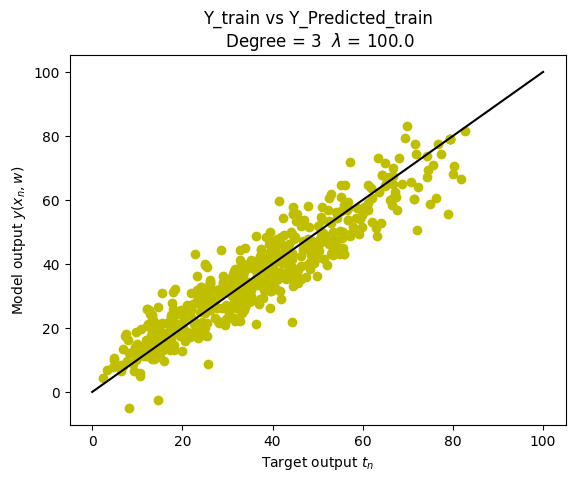

In [ ]:
# Best model
# Degree =3, Lamda= 100


x = np.linspace(0,100,10)

basis = polynomial_basis_combination(X_train,3)
wstar = polynomial_regression_regularization(X_train,y_train,3,100)
ypred_train= np.matmul(basis, wstar)



plt.plot(x,x,color = 'black', linewidth = 1.5)
plt.scatter(y_train,ypred_train,color='y')

plt.xlabel('Target output $t_n$')
plt.ylabel('Model output $y(x_n,w)$')
plt.title('Y_train vs Y_Predicted_train\n Degree = 3  $\lambda$ = 100.0')





Text(0.5, 1.0, 'Y_test vs Y_Predicted_test\n Degree = 3  $\\lambda$ = 100.0')

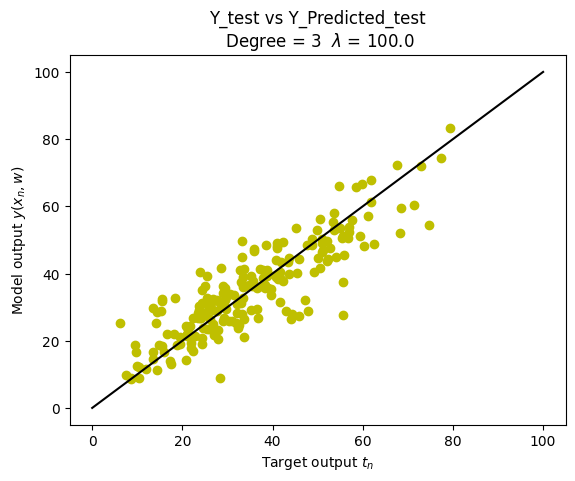

In [ ]:
basis_2=polynomial_basis_combination(X_test,3)
ypred_test= np.matmul(basis_2, wstar)

plt.plot(x,x,color = 'black', linewidth = 1.5)
plt.scatter(y_test,ypred_test,color='y')


plt.xlabel('Target output $t_n$')
plt.ylabel('Model output $y(x_n,w)$')
plt.title('Y_test vs Y_Predicted_test\n Degree = 3  $\lambda$ = 100.0')




Text(0.5, 1.0, 'Y_validation vs Y_Predicted_validation\n Degree = 3  $\\lambda$ = 100.0')

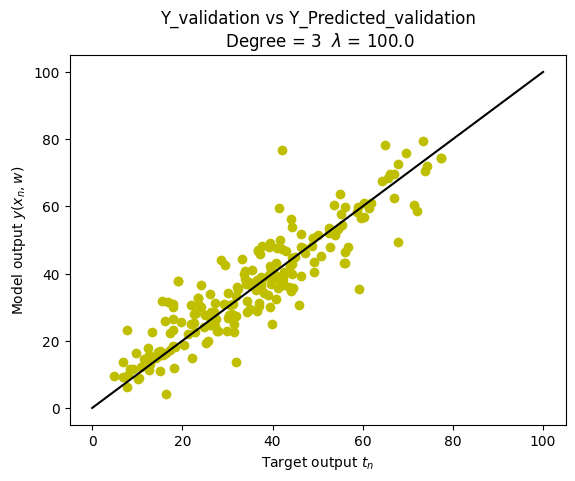

In [ ]:
basis_3=polynomial_basis_combination(X_val,3)
ypred_val= np.matmul(basis_3, wstar)

plt.plot(x,x,color = 'black', linewidth = 1.5)
plt.scatter(y_val,ypred_val,color='y')


plt.xlabel('Target output $t_n$')
plt.ylabel('Model output $y(x_n,w)$')
plt.title('Y_validation vs Y_Predicted_validation\n Degree = 3  $\lambda$ = 100.0')




In [ ]:
i=0
lamda=[0,1e-6,1e-2,1,100]
for degree in degrees:
  print('degree: '+str(degree)+'\n')
  basis=polynomial_basis_combination(X_train,degree)
  basis_1=polynomial_basis_combination(X_val,degree)
  basis_2=polynomial_basis_combination(X_test,degree)
  N_train=X_train.shape[0]
  N_val=X_val.shape[0]
  N_test=X_test.shape[0]

  for lam in lamda:
    i=i+1
    wstar = polynomial_regression_regularization(X_train,y_train,degree,lam)

    ypred_train= np.matmul(basis, wstar)
    ypred_val= np.matmul(basis_1, wstar)
    ypred_test= np.matmul(basis_2, wstar)

    erms_train= np.sqrt((np.sum((ypred_train - y_train)**2))/N_train)
    erms_val= np.sqrt((np.sum((ypred_val - y_val)**2))/N_val)
    erms_test= np.sqrt((np.sum((ypred_test - y_test)**2))/N_test)

    print(str(erms_train) + ' '+ str(erms_val) + ' '+ str(erms_test))

degree: 1.0

11.58870853969053 11.260433700771209 10.863544312995137
11.5887085397117 11.260430378946298 10.863541440053702
11.590708894853586 11.230578817629757 10.837938790907879
12.919501213385379 12.1075065747496 11.736988632867186
13.89601466482684 13.097989861294694 12.692328787948739
degree: 2.0

8.518829131527886 8.362130088728621 8.505729545651004
8.518829129528344 8.362129648117063 8.505729043315666
8.518825992138247 8.360924482661346 8.504346875628945
8.51937211439153 8.379647557235067 8.524829744206126
8.53319184238083 8.440297229688493 8.541752447988676
degree: 3.0

6.279970126021029 7.308509140655442 7.675958826237791
6.279970126453192 7.308509142028981 7.6759588229815225
6.279960158391629 7.308421185331375 7.675890154621301
6.280459293354981 7.308939670797257 7.675300332262356
6.260615817541942 7.266586318897012 7.553996321068245
degree: 4.0

4.571177734343676 9.540639708483079 11.705119599229395
4.571177734072517 9.540640064827622 11.705121002723548
4.57117773408965 9.5